In [1]:
from pycdft import *
from ase.io import read

In [2]:
cell = Cell("./He2.cif")

In [3]:
ds = [2.9, 3.0, 3.1]
Vs = [1.191584, 1.274559, 1.329482]

Eds = []
Ecs = []
Ws = []
Fds = []
Fcs = []
Fws = []

for d, V in zip(ds, Vs):
    cell.atoms[1].abs_coord[2] = d
    sample = Sample(ase_cell=cell.ase_cell, n1=80, n2=80, n3=80, vspin=1)
    print(sample.atoms[1])
    
    qboxdriver = QboxDriver(
        sample=sample,
        init_cmd="load gs.xml\nset xc PBE\nset wf_dyn PSDA\nset_atoms_dyn CG\nset scf_tol 1.0E-8\n",
        scf_cmd="run 0 50 5",
    )
    
    solver = CDFTSolver(job="opt", optimizer="secant", sample=sample, maxstep=1, dft_driver=qboxdriver)
    
    c = ChargeConstraint(
        sample=solver.sample,
        fragment=Fragment(solver.sample, solver.sample.atoms[0:1]),
        V_init=V,
        N0=1,
        N_tol=1.0E-3
    )
#     c = ChargeTransferConstraint(
#         sample=solver.sample,
#         donor=Fragment(solver.sample, solver.sample.atoms[0:1]),
#         acceptor=Fragment(solver.sample, solver.sample.atoms[1:2]),
#         V_init=0,
#         N0=1,
#         N_tol=1.0E-3
#     )
    
    solver.solve()
    
    Eds.append(sample.Ed)
    Ecs.append(sample.Ec)
    Ws.append(sample.W)
    Fds.append(sample.Fd[0][2])
    Fcs.append(sample.Fc[0][2])
    Fws.append(sample.Fw[0][2])

Atom He. Abs coord (0.000, 0.000, 2.900). 
QboxDriver: setting output path to ./pycdft_outputs/solver1/...
QboxDriver: waiting for Qbox to start...
QboxDriver: initializing Qbox...
Geometry optimization step 1
Updating constraint with new structure...
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
SCF iteration 1
  Ed (DFT energy) = -4.723271
  Ec (constraint energy) = 1.191469
  E (Ed + Ec) = -3.531802
  W (free energy) = -4.723262
  > Constraint #0 (type = charge, N0 = 1, V = 1.191584):
    N = 0.999896
    dW/dV = N - N0 = -0.000104
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
*Constrained SCF converged!*

Maximum force = 0.207178 au, on 1th atom (He).  Fw = 0.000000, 0.000000, 0.207178
  Fd = -0.000000, -0.000000, 0.121502; Fc = 0.000000, 0.000000, 0.085676
Updating constraint with new structure...

**Constrained optimization NOT achieved after 1 steps!**

Atom He. Abs coord (0.000, 0.000, 3.000). 
QboxDriver: setting output path to ./pycdft_outputs/solver2/...
QboxDriver: waiting for Qbox to start...
QboxD

In [4]:
Eds

[-4.72327146, -4.7156712800000005, -4.70595578]

In [5]:
Ecs

[1.19146904, 1.275836, 1.33077003]

In [6]:
Ws

[-4.7232622620660223, -4.7156612553761228, -4.7059455634154581]

In [7]:
Fds

[0.057670409999999998, 0.053490500000000003, 0.047153260000000002]

In [8]:
Fcs

[0.093888650405107091, 0.10086650239355074, 0.10679309680809296]

In [9]:
Fws

[0.15155906040510708, 0.15435700239355074, 0.15394635680809296]

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

In [11]:
Ets = np.array(Eds) + Ecs

In [12]:
Ets - np.array(Vs) * 1.2

array([-4.96170322, -4.96930608, -4.97056415])

In [13]:
Ws

[-4.7232622620660223, -4.7156612553761228, -4.7059455634154581]

In [14]:
Ets = np.array(Eds) + np.array(Ecs)

Ed = Eds[1]
Ec = Ecs[1]
Et = Ets[1]
W = Ws[1]

Fd = Fds[1]
Fc = Fcs[1]
Fw = Fws[1]

In [15]:
Eds_by_force = [Ed - (-0.1) * (-Fd), Ed, Ed - (0.1) * (-Fd)]
Ecs_by_force = [Ec - (-0.1) * (-Fc), Ec, Ec - (0.1) * (-Fc)]
Ets_by_force = [Et - (-0.1) * (-Fw), Et, Et - (0.1) * (-Fw)]
Ws_by_force = [W - (-0.1) * (-Fw), W, W - (0.1) * (-Fw)]

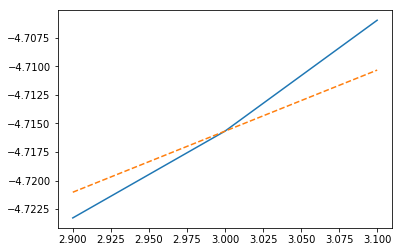

In [16]:
plt.plot(ds, Eds)
plt.plot(ds, Eds_by_force, "--")

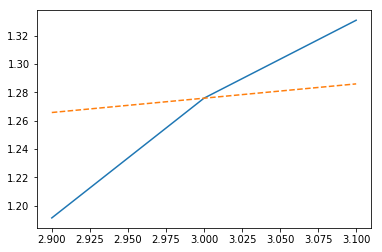

In [17]:
plt.plot(ds, Ecs)
plt.plot(ds, Ecs_by_force, "--")

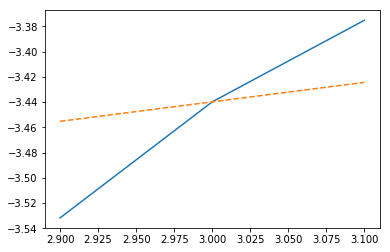

In [18]:
plt.plot(ds, Ets)
plt.plot(ds, Ets_by_force, "--")

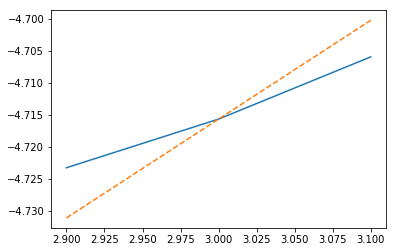

In [19]:
plt.plot(ds, Ws)
plt.plot(ds, Ws_by_force, "--")